In [1]:
%load_ext autoreload
%autoreload 2

import sys
from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np
import matplotlib.pyplot as plt

LOG.propagate = False

In [2]:
LOG.debug("debug")
LOG.info("info")
LOG.warning("warning")
LOG.error("error")
LOG.critical("critical")

2024-03-11 17:30:00,268 | INFO     |: info
2024-03-11 17:30:00,272 | WARNING  |: warning
2024-03-11 17:30:00,273 | ERROR    |: error
2024-03-11 17:30:00,274 | CRITICAL |: critical


In [19]:
# Get ArtemisBLEController object
ble = get_ble_controller()

# Connect to the Artemis Device
ble.connect()

2024-03-11 17:36:33,681 | INFO     |: Looking for Artemis Nano Peripheral Device: c0:89:c1:6d:24:4b
2024-03-11 17:36:38,524 | INFO     |: Connected to c0:89:c1:6d:24:4b


In [20]:
ble.send_command(CMD.ECHO, "HiHello")
output1 = ble.receive_string(ble.uuid['RX_STRING'])
print(output1)

Robot says -> HiHello :)


In [21]:
raw_message=[]
#add more arrays if needed
num = []
time = [] #in seconds
xAcc = [] 
yAcc = []
zAcc = []
xGyr = [] 
yGyr = []
zGyr = []
def clear_data():
    # Clear all the sensor data arrays
    time.clear()
    xAcc.clear()
    yAcc.clear()
    zAcc.clear()
    xGyr.clear()
    yGyr.clear()
    zGyr.clear()
def notification_handler(uuid, byte_array):
    global time,xAcc,yAcc,zAcc,xGyr,yGyr,zGyr
    raw_message.append(byte_array)
    # Extracts the time portion in seconds from the byte array
    message = ble.bytearray_to_string(byte_array)
    readings = message.split('|')
    num.clear()
    for reading in readings:
        label, value = reading.split(':')
        num.append(float(value))
    #Add more arrays if needed
    time.append(num[0]/1000)
    xAcc.append(num[1])
    yAcc.append(num[2])
    zAcc.append(num[3])
    xGyr.append(num[4])
    yGyr.append(num[5])
    zGyr.append(num[6])
    #print(f"Time: {float(num[0])/1000}s; xAcc: {num[1]}; yAcc: {num[2]}; xAcc: {num[1]}; xAcc: {num[1]}; xAcc: {num[1]}; xAcc: {num[1]}")

In [22]:
ble.start_notify(ble.uuid['RX_STRING'], notification_handler)

In [29]:
#clear_data()
ble.send_command(CMD.GET_IMU_DATA, "")

In [30]:
print(f"It takes: {round(time[-1]-time[0],3)}s to collect data.")
print(f"Sample rate is about {round(len(time)/(time[-1]-time[0]))} samples/s.")

It takes: 52.014s to collect data.
Sample rate is about 11 samples/s.


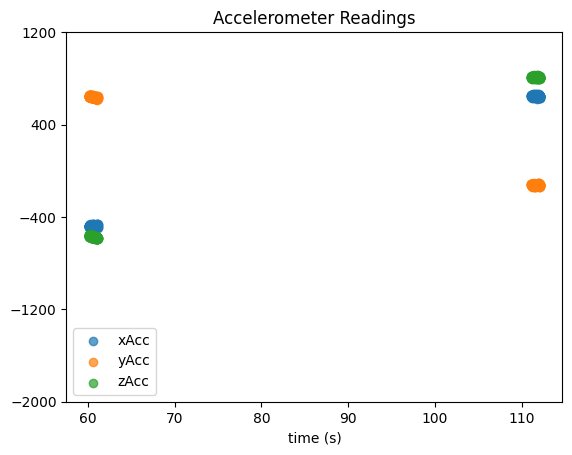

2024-03-11 17:42:38,174 | INFO     |: Disconnected from C0:89:C1:6D:24:4B


In [31]:
plt.scatter(time, xAcc, label = 'xAcc', alpha=0.7)
plt.scatter(time, yAcc, label = 'yAcc', alpha=0.7)
plt.scatter(time, zAcc, label = 'zAcc', alpha=0.7)
plt.xlabel('time (s)')
plt.title('Accelerometer Readings')
plt.yticks(np.arange(-2000, 2000, step=800));
plt.legend();

In [24]:
ble.stop_notify(ble.uuid['RX_STRING'])

In [39]:
len(time)

5851

In [16]:
# Disconnect
ble.disconnect()

2024-03-10 15:23:36,134 | INFO     |: Disconnected from C0:89:C1:6D:24:4B


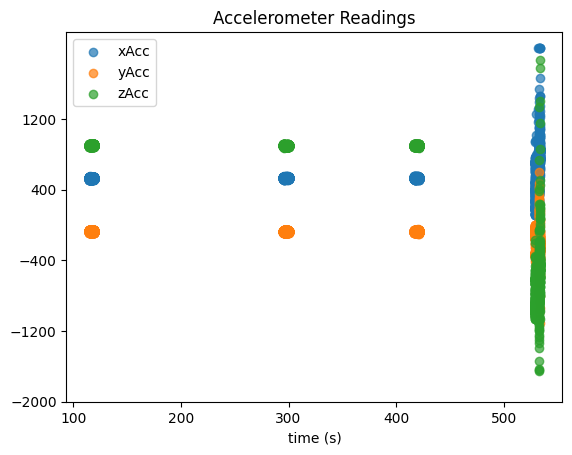

In [38]:
plt.scatter(time, xAcc, label = 'xAcc', alpha=0.7)
plt.scatter(time, yAcc, label = 'yAcc', alpha=0.7)
plt.scatter(time, zAcc, label = 'zAcc', alpha=0.7)
plt.xlabel('time (s)')
plt.title('Accelerometer Readings')
plt.yticks(np.arange(-2000, 2000, step=800));
plt.legend();

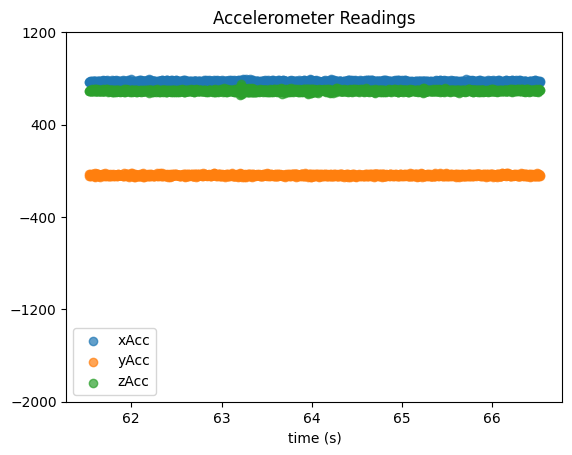

In [17]:
plt.scatter(time, xAcc, label = 'xAcc', alpha=0.7)
plt.scatter(time, yAcc, label = 'yAcc', alpha=0.7)
plt.scatter(time, zAcc, label = 'zAcc', alpha=0.7)
plt.xlabel('time (s)')
plt.title('Accelerometer Readings')
plt.yticks(np.arange(-2000, 2000, step=800));
plt.legend();